In [ ]:
# 1. IMPORT TH∆Ø VI·ªÜN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# 2. ƒê·ªåC D·ªÆ LI·ªÜU & X·ª¨ L√ù BAN ƒê·∫¶U
file_path = "data_HN.csv"
df = pd.read_csv(file_path)

print(df)

             date  is_weekend  is_holiday admin_type      district  \
0      01/01/2022        True        True       Qu·∫≠n       Ba ƒê√¨nh   
1      01/01/2022        True        True       Qu·∫≠n     Ho√†n Ki·∫øm   
2      01/01/2022        True        True       Qu·∫≠n  Hai B√† Tr∆∞ng   
3      01/01/2022        True        True       Qu·∫≠n       ƒê·ªëng ƒêa   
4      01/01/2022        True        True       Qu·∫≠n        T√¢y H·ªì   
...           ...         ...         ...        ...           ...   
31779  31/12/2024       False       False      Huy·ªán       ·ª®ng H√≤a   
31780  31/12/2024       False       False      Huy·ªán    Th∆∞·ªùng T√≠n   
31781  31/12/2024       False       False      Huy·ªán     Ph√∫ Xuy√™n   
31782  31/12/2024       False       False      Huy·ªán       M√™ Linh   
31783  31/12/2024       False       False      Huy·ªán       S∆°n T√¢y   

       population  area_km2  vehicle_count  temperature  rainfall  humidity  \
0          221893        92       

M√¥ t·∫£ bi·∫øn:

    date: Ng√†y quan s√°t

    is_weekend: c√≥ ph·∫£i ng√†y cu·ªëi tu·∫ßn kh√¥ng ?

    is_holiday: C√≥ ph·∫£i ng√†y ngh·ªâ l·ªÖ kh√¥ng ?

    admin_type: Lo·∫°i ƒë·ªãa b√†n: Huy·ªán / Qu·∫≠n

    district: T√™n qu·∫≠n/huy·ªán

    population: D√¢n s·ªë c·ªßa qu·∫≠n/huy·ªán

    area_km2: Di·ªán t√≠ch (km¬≤) c·ªßa qu·∫≠n/huy·ªán

    vehicle_count: S·ªë l∆∞·ª£ng ph∆∞∆°ng ti·ªán (t·ªïng h·ª£p)

    temperature: Nhi·ªát ƒë·ªô

    rainfall: L∆∞·ª£ng m∆∞a (mm)

    air_quality: ch·ªâ s·ªë ch·∫•t l∆∞·ª£ng kh√¥ng kh√≠

    special_event:
    
    ng√†y l·ªÖ:
        1: new year
        2: Cultural Festival
        3: Market Day
        4: Road Construction
        5: Sports Event
        6: Government Meeting

    traffic_congestion_level: M·ª©c ƒë·ªô √πn t·∫Øc

In [ ]:
# 4. Ki·ªÉm tra c√°c d√≤ng c√≤n thi·∫øu d·ªØ li·ªáu
missing_data = df.isnull().sum()
print("C√°c c·ªôt c√≥ d·ªØ li·ªáu thi·∫øu:\n", missing_data[missing_data > 0])

C√°c c·ªôt c√≥ d·ªØ li·ªáu thi·∫øu:
 special_event    87
dtype: int64


In [ ]:
#X·ª≠ l√Ω ngo·∫°i l·ªá ƒë∆°n gi·∫£n:
# - Lo·∫°i b·ªè d√≤ng c√≥ nhi·ªát ƒë·ªô b·∫•t th∆∞·ªùng (<100 ho·∫∑c >450, t∆∞∆°ng ƒë∆∞∆°ng 10¬∞C ƒë·∫øn 45¬∞C)
df = df[(df['temperature'] >= 100) & (df['temperature'] <= 450)]

In [ ]:
#Chuy·ªÉn ƒë·ªïi ƒë·ªãnh d·∫°ng c·ªôt 'date' sang ki·ªÉu datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

#ƒê·∫£m b·∫£o c√°c c·ªôt boolean ƒë√∫ng ki·ªÉu
bool_columns = ['is_weekend', 'is_holiday']
for col in bool_columns:
    df[col] = df[col].astype(bool)

Tr·ª±c quan h√≥a

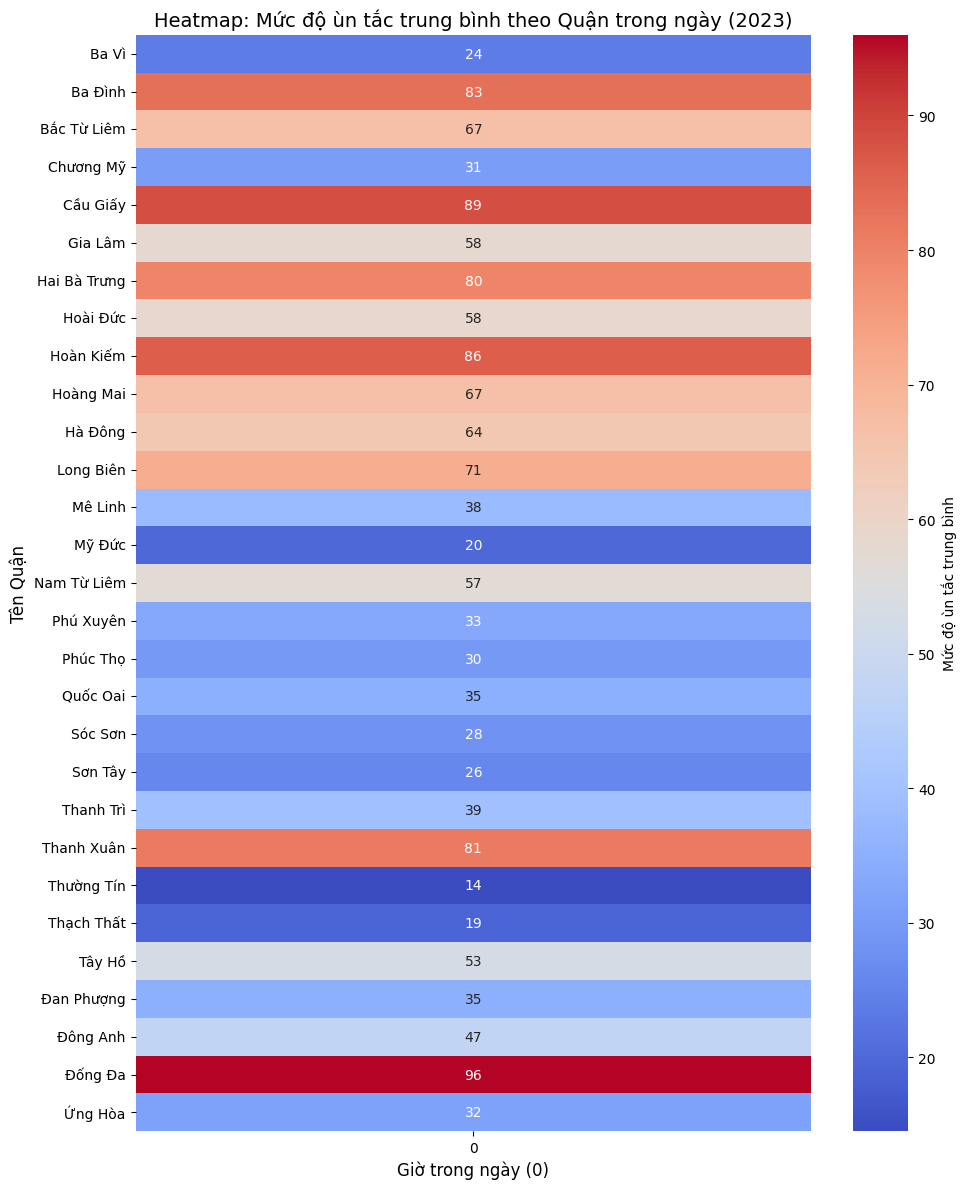

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# T√≠nh m·ª©c ƒë·ªô √πn t·∫Øc trung b√¨nh theo t·ª´ng qu·∫≠n
avg_congestion_by_district = df.groupby("district")["traffic_congestion_level"].mean().sort_values(ascending=False)

# Chuy·ªÉn sang DataFrame cho ph√π h·ª£p v·ªõi heatmap
heatmap_data = pd.DataFrame(avg_congestion_by_district).reset_index()
heatmap_data.columns = ["T√™n Qu·∫≠n", "M·ª©c ƒë·ªô √πn t·∫Øc trung b√¨nh"]

# Chu·∫©n b·ªã l·∫°i d·ªØ li·ªáu ƒë·ªÉ t·∫°o heatmap c√≥ 1 c·ªôt gi·ªù c·ªë ƒë·ªãnh (v√≠ d·ª•: gi·ªù = 0)
heatmap_data["Gi·ªù"] = 0
heatmap_pivot = heatmap_data.pivot(index="T√™n Qu·∫≠n", columns="Gi·ªù", values="M·ª©c ƒë·ªô √πn t·∫Øc trung b√¨nh")

# V·∫Ω heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'M·ª©c ƒë·ªô √πn t·∫Øc trung b√¨nh'})
plt.title("Heatmap: M·ª©c ƒë·ªô √πn t·∫Øc trung b√¨nh theo Qu·∫≠n trong ng√†y (2023)", fontsize=14)
plt.xlabel("Gi·ªù trong ng√†y (0)", fontsize=12)
plt.ylabel("T√™n Qu·∫≠n", fontsize=12)
plt.tight_layout()
plt.show()


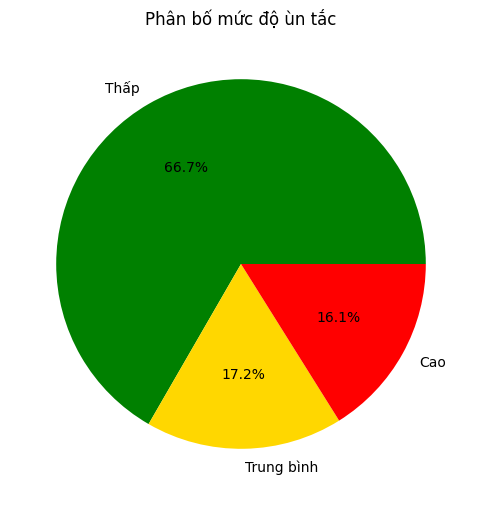

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("data_HN.csv")

# Chuy·ªÉn ƒë·ªïi ng√†y v·ªÅ ƒë√∫ng ki·ªÉu, x·ª≠ l√Ω l·ªói ng√†y kh√¥ng h·ª£p l·ªá
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Lo·∫°i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã ng√†y b·ªã l·ªói (NaT)
df = df.dropna(subset=['date'])

# Th√™m c·ªôt 'hour' gi·∫£ l·∫≠p n·∫øu ch∆∞a c√≥ (v√¨ kh√¥ng c√≥ s·∫µn trong d·ªØ li·ªáu)
# N·∫øu c√≥ c·ªôt 'hour' th·∫≠t s·ª±, c√≥ th·ªÉ b·ªè ph·∫ßn n√†y
df['hour'] = df['date'].dt.hour  # m·∫∑c ƒë·ªãnh v·ªÅ 0 v√¨ kh√¥ng c√≥ gi·ªù c·ª• th·ªÉ

# Ph√¢n lo·∫°i m·ª©c ƒë·ªô √πn t·∫Øc: 0=Th·∫•p, 1=TB, 2=Cao (d·ª±a theo traffic_congestion_level)
def label_congestion(x):
    if x < 60:
        return 'Th·∫•p'
    elif x < 80:
        return 'Trung b√¨nh'
    else:
        return 'Cao'

df['level_label'] = df['traffic_congestion_level'].apply(label_congestion)

# Bi·ªÉu ƒë·ªì 1: Bi·ªÉu ƒë·ªì tr√≤n - ph√¢n b·ªë m·ª©c ƒë·ªô √πn t·∫Øc
plt.figure(figsize=(6, 6))
pie_data = df['level_label'].value_counts()
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['green', 'gold', 'red'])
plt.title('Ph√¢n b·ªë m·ª©c ƒë·ªô √πn t·∫Øc')
plt.show()


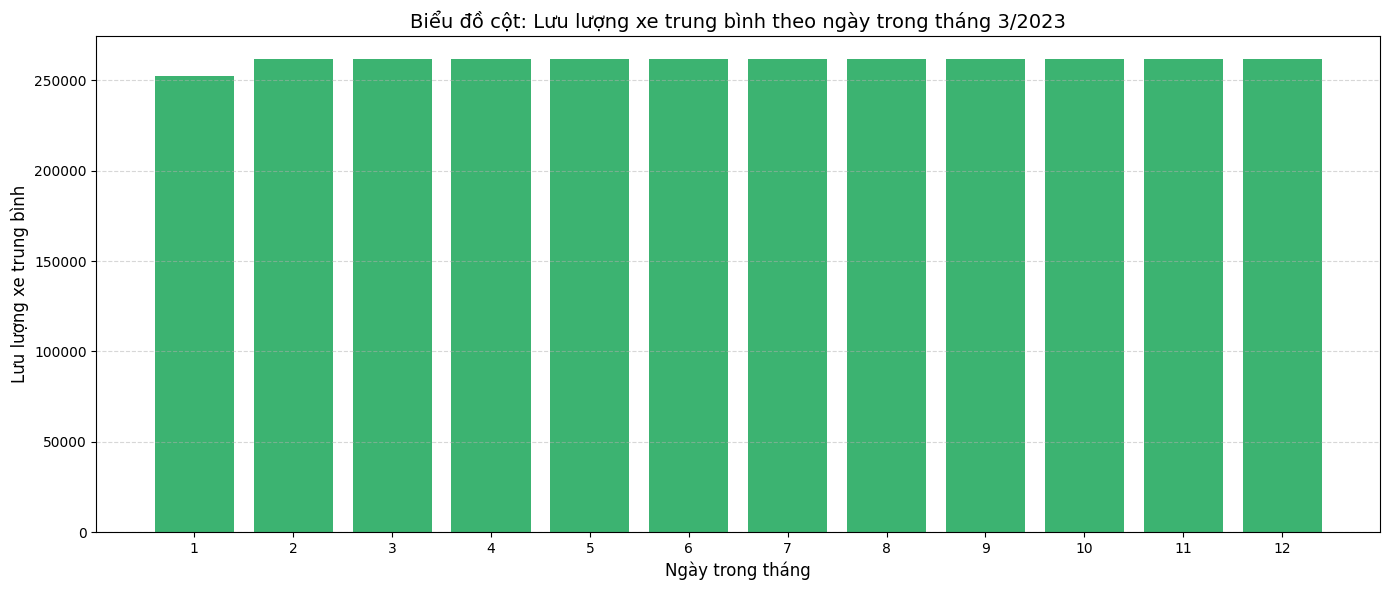

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("data_HN.csv")

# Chuy·ªÉn c·ªôt 'date' v·ªÅ ki·ªÉu datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Ch·ªçn m·ªôt th√°ng c·ª• th·ªÉ (v√≠ d·ª•: th√°ng 3 nƒÉm 2023)
df_month = df[(df['date'].dt.month == 3) & (df['date'].dt.year == 2023)]

# Tr√≠ch xu·∫•t ng√†y trong th√°ng
df_month['day'] = df_month['date'].dt.day

# T√≠nh t·ªïng ho·∫∑c trung b√¨nh l∆∞u l∆∞·ª£ng xe m·ªói ng√†y
daily_counts = df_month.groupby('day')['vehicle_count'].mean()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 6))
plt.bar(daily_counts.index, daily_counts.values, color='mediumseagreen')
plt.xticks(daily_counts.index)
plt.xlabel('Ng√†y trong th√°ng', fontsize=12)
plt.ylabel('L∆∞u l∆∞·ª£ng xe trung b√¨nh', fontsize=12)
plt.title('Bi·ªÉu ƒë·ªì c·ªôt: L∆∞u l∆∞·ª£ng xe trung b√¨nh theo ng√†y trong th√°ng 3/2023', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


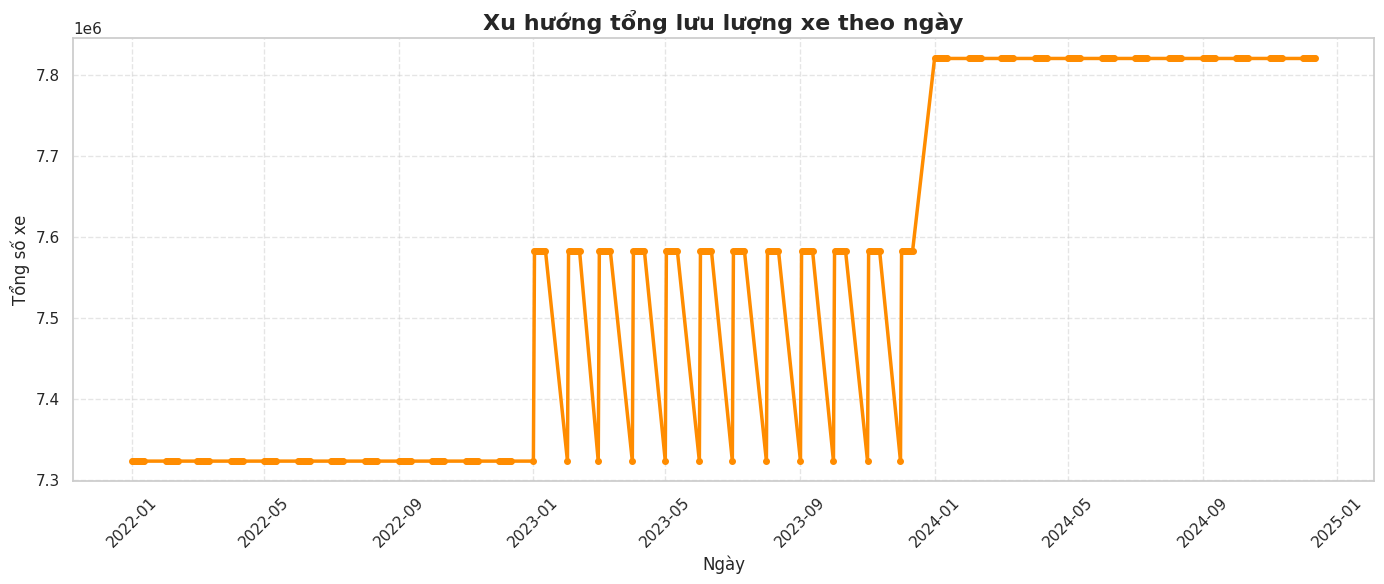

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thi·∫øt l·∫≠p phong c√°ch bi·ªÉu ƒë·ªì
sns.set(style="whitegrid")

# T·∫°o bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
plt.figure(figsize=(14, 6))
line_data = df.groupby('date')['vehicle_count'].sum()

# V·∫Ω ƒë∆∞·ªùng v·ªõi hi·ªáu ·ª©ng n·ªïi b·∫≠t
plt.plot(line_data.index, line_data.values, color='darkorange', linewidth=2.5, marker='o', markersize=4)

# Th√™m c√°c chi ti·∫øt c·∫£i thi·ªán th·∫©m m·ªπ
plt.title('Xu h∆∞·ªõng t·ªïng l∆∞u l∆∞·ª£ng xe theo ng√†y', fontsize=16, fontweight='bold')
plt.xlabel('Ng√†y', fontsize=12)
plt.ylabel('T·ªïng s·ªë xe', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# B∆Ø·ªöC 1: ƒê·ªçc v√† chu·∫©n b·ªã d·ªØ li·ªáu
df = pd.read_csv("data_HN.csv")
df = df.dropna()  # Lo·∫°i b·ªè d√≤ng thi·∫øu d·ªØ li·ªáu

# B∆Ø·ªöC 2: X√°c ƒë·ªãnh ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o v√† nh√£n ƒë·∫ßu ra
# ƒê·∫∑c tr∆∞ng ƒë·∫ßu v√†o: nh·ªØng y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn √πn t·∫Øc
features = ['vehicle_count', 'temperature', 'humidity', 'rainfall']
X = df[features]

# Nh√£n (label): m·ª©c ƒë·ªô √πn t·∫Øc (do con ng∆∞·ªùi ho·∫∑c c·∫£m bi·∫øn g√°n s·∫µn)
y = df['traffic_congestion_level']  # 0 = th·∫•p, 1 = TB, 2 = cao

# B∆Ø·ªöC 3: Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# B∆Ø·ªöC 4: Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# B∆Ø·ªöC 5: D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra v√† ƒë√°nh gi√° hi·ªáu qu·∫£
y_pred = model.predict(X_test)

# In b√°o c√°o ph√¢n lo·∫°i: ƒë·ªô ch√≠nh x√°c, precision, recall, F1
print("üîç K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN UNG T·∫ÆC (Ph√¢n lo·∫°i):")
print(classification_report(y_test, y_pred))


üîç K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN UNG T·∫ÆC (Ph√¢n lo·∫°i):
              precision    recall  f1-score   support

          12       1.00      1.00      1.00       151
          13       1.00      1.00      1.00        76
          14       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        79
          17       1.00      1.00      1.00       150
          18       1.00      1.00      1.00       135
          19       1.00      1.00      1.00       147
          20       1.00      1.00      1.00        79
          21       1.00      1.00      1.00       163
          23       0.99      0.97      0.98       205
          24       1.00      1.00      1.00        77
          26       1.00      1.00      1.00        65
          30       1.00      1.00      1.00        65
          32       1.00      1.00      1.00        84
          34       1.00      1.00      1.00       152
          35       1.00      1.00      1.00       213
          37       1.00   

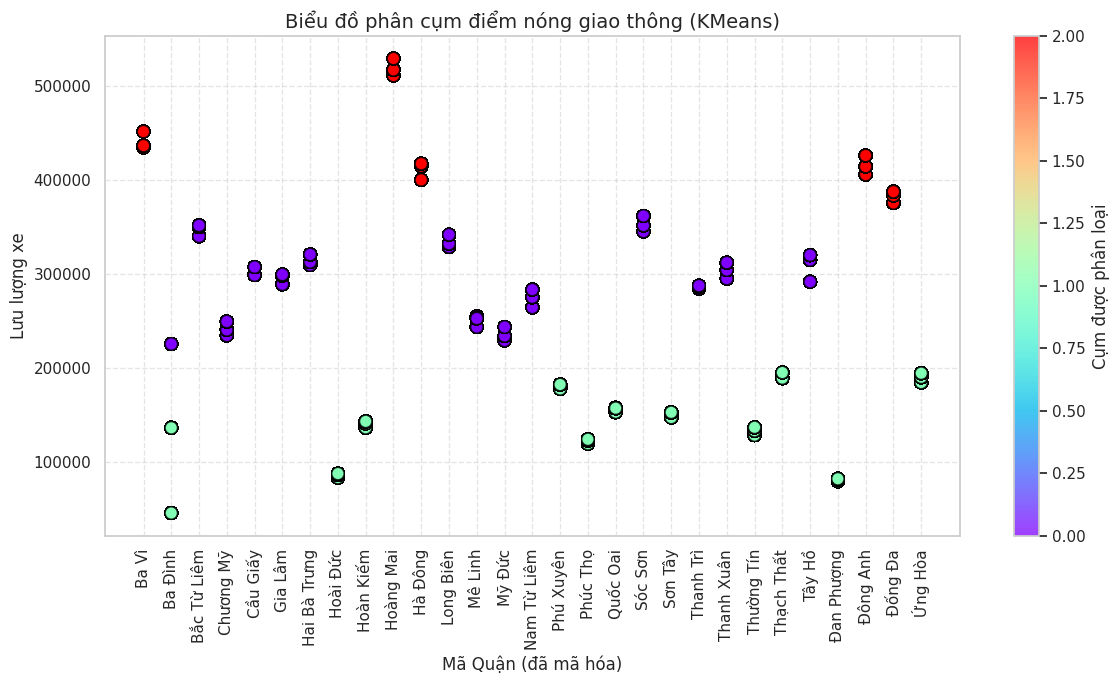

In [ ]:
# Reload after environment reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data again
df = pd.read_csv("data_HN.csv")
df = df.dropna()

# Encode district names into numerical codes
df['district_code'] = df['district'].astype('category').cat.codes
district_labels = dict(enumerate(df['district'].astype('category').cat.categories))

# Prepare clustering input data
X_cluster = df[['district_code', 'vehicle_count']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Improved visualization of clusters
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df['district_code'],
    df['vehicle_count'],
    c=df['cluster'],
    cmap='rainbow',
    edgecolor='black',
    s=80,
    alpha=0.75
)

plt.xlabel("M√£ Qu·∫≠n (ƒë√£ m√£ h√≥a)", fontsize=12)
plt.ylabel("L∆∞u l∆∞·ª£ng xe", fontsize=12)
plt.title("Bi·ªÉu ƒë·ªì ph√¢n c·ª•m ƒëi·ªÉm n√≥ng giao th√¥ng (KMeans)", fontsize=14)
plt.colorbar(label='C·ª•m ƒë∆∞·ª£c ph√¢n lo·∫°i')
plt.xticks(ticks=range(len(district_labels)), labels=list(district_labels.values()), rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# G·∫Øn nh√£n ph√¢n lo·∫°i cho m·ª©c ƒë·ªô √πn t·∫Øc
def classify_congestion(level):
    if level < 33:
        return 0  # Th·∫•p
    elif level < 66:
        return 1  # Trung b√¨nh
    else:
        return 2  # Cao

df['congestion_class'] = df['traffic_congestion_level'].apply(classify_congestion)

# Ch·ªçn ƒë·∫∑c tr∆∞ng
features = ['is_weekend', 'is_holiday', 'population', 'area_km2',
            'vehicle_count', 'temperature', 'rainfall', 'humidity',
            'air_quality', 'special_event']
X = df[features]
y = df['congestion_class']

# T√°ch d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh
y_pred = model.predict(X_test)
print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_test, y_pred, target_names=["Th·∫•p", "Trung b√¨nh", "Cao"]))
print("Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(y_test, y_pred))


B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

        Th·∫•p       1.00      1.00      1.00       596
  Trung b√¨nh       1.00      1.00      1.00      1153
         Cao       1.00      1.00      1.00       740

    accuracy                           1.00      2489
   macro avg       1.00      1.00      1.00      2489
weighted avg       1.00      1.00      1.00      2489

Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[ 596    0    0]
 [   0 1153    0]
 [   0    0  740]]


Epoch 1/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 34ms/step - loss: 0.2090 - mae: 0.4095 - val_loss: 0.1840 - val_mae: 0.4003
Epoch 2/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 0.1814 - mae: 0.3909 - val_loss: 0.1676 - val_mae: 0.3732
Epoch 3/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.1685 - mae: 0.3734 - val_loss: 0.1434 - val_mae: 0.3337
Epoch 4/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.1354 - mae: 0.3144 - val_loss: 0.1054 - val_mae: 0.2831
Epoch 5/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0951 - mae: 0.2609 - val_loss: 0.0921 - val_mae: 0.2464
Epoch 6/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0625 - mae: 0.2061 - val_loss: 0.0400 - val_mae: 0.1638
Epoch 7/20
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

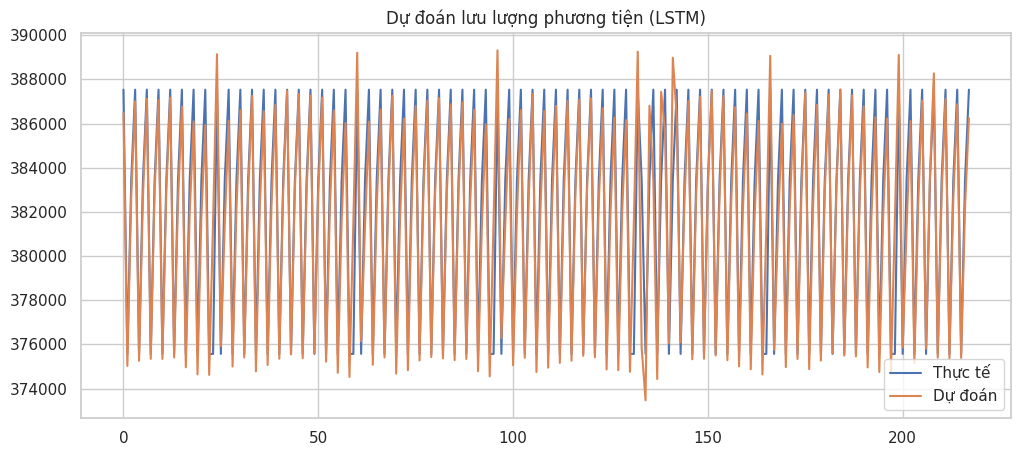

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("data_HN.csv")


# Ch·ªçn m·ªôt qu·∫≠n c·ª• th·ªÉ
df_dd = df[df['district'] == 'ƒê·ªëng ƒêa'].sort_values('date')
df_dd = df_dd[['vehicle_count', 'temperature', 'rainfall', 'humidity']]

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_dd)

# H√†m t·∫°o chu·ªói cho LSTM
def create_sequences(data, lookback=10):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback][0])  # vehicle_count
    return np.array(X), np.array(y)

lookback = 10
X, y = create_sequences(scaled, lookback)
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# X√¢y d·ª±ng m√¥ h√¨nh LSTM
model = Sequential([
    LSTM(64, input_shape=(lookback, X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# Chuy·ªÉn ng∆∞·ª£c l·∫°i gi√° tr·ªã th·ª±c
y_pred_inv = scaler.inverse_transform(
    np.hstack([y_pred, np.zeros((y_pred.shape[0], scaled.shape[1] - 1))])
)[:, 0]

y_test_inv = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled.shape[1] - 1))])
)[:, 0]

# ƒê√°nh gi√°
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print("MAE:", mae)
print("RMSE:", rmse)

# V·∫Ω bi·ªÉu ƒë·ªì d·ª± ƒëo√°n
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Th·ª±c t·∫ø')
plt.plot(y_pred_inv, label='D·ª± ƒëo√°n')
plt.legend()
plt.title("D·ª± ƒëo√°n l∆∞u l∆∞·ª£ng ph∆∞∆°ng ti·ªán (LSTM)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("data_HN.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df = df.sort_values('date')
df = df[df['date'].dt.year == 2023]  # L·ªçc d·ªØ li·ªáu nƒÉm 2023

# T√≠nh t·ªïng l∆∞u l∆∞·ª£ng xe m·ªói ng√†y
daily_data = df.groupby(df['date'].dt.date)['vehicle_count'].sum().reset_index()
daily_data.columns = ['date', 'vehicle_count']

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# -------------------- Random Forest --------------------
# T·∫°o ƒë·∫∑c tr∆∞ng ƒë∆°n gi·∫£n: ng√†y d∆∞·ªõi d·∫°ng s·ªë
train_rf = train.copy()
test_rf = test.copy()
train_rf['day_num'] = np.arange(len(train_rf))
test_rf['day_num'] = np.arange(len(train_rf), len(train_rf) + len(test_rf))

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_rf[['day_num']], train_rf['vehicle_count'])
rf_pred = rf_model.predict(test_rf[['day_num']])
rf_rmse = np.sqrt(mean_squared_error(test_rf['vehicle_count'], rf_pred))
rf_mae = mean_absolute_error(test_rf['vehicle_count'], rf_pred)

# -------------------- LSTM --------------------
# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data['vehicle_count'].values.reshape(-1,1))

# T·∫°o d·ªØ li·ªáu hu·∫•n luy·ªán v√† ki·ªÉm tra cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size_lstm = int(len(X) * 0.8)
X_train, X_test = X[:train_size_lstm], X[train_size_lstm:]
Y_train, Y_test = Y[:train_size_lstm], Y[train_size_lstm:]

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=0)

lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1,1))
lstm_rmse = np.sqrt(mean_squared_error(Y_test_inv, lstm_pred))
lstm_mae = mean_absolute_error(Y_test_inv, lstm_pred)

# -------------------- K·∫øt qu·∫£ --------------------
print("So s√°nh hi·ªáu su·∫•t c√°c m√¥ h√¨nh:")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")
print(f"LSTM - RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 190ms/step
So s√°nh hi·ªáu su·∫•t c√°c m√¥ h√¨nh:
Random Forest - RMSE: 68109.96, MAE: 17886.55
LSTM - RMSE: 70845.96, MAE: 55631.71


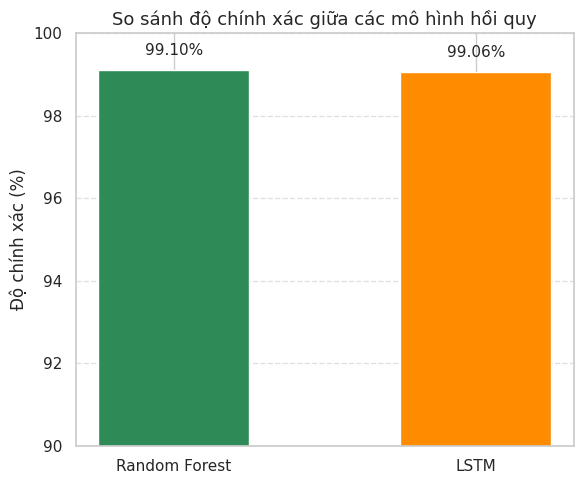

In [ ]:
import matplotlib.pyplot as plt

# ƒê·ªô ch√≠nh x√°c (∆∞·ªõc l∆∞·ª£ng t·ª´ RMSE)
accuracy_rf = 100 * (1 - rf_rmse / daily_data['vehicle_count'].mean())
accuracy_lstm = 100 * (1 - lstm_rmse / daily_data['vehicle_count'].mean())

# D·ªØ li·ªáu
models = ['Random Forest', 'LSTM']
accuracies = [accuracy_rf, accuracy_lstm]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, width=0.5, color=['seagreen', 'darkorange'])

# C·∫•u h√¨nh bi·ªÉu ƒë·ªì
plt.ylim(90, 100)
plt.ylabel('ƒê·ªô ch√≠nh x√°c (%)', fontsize=12)
plt.title('So s√°nh ƒë·ªô ch√≠nh x√°c gi·ªØa c√°c m√¥ h√¨nh h·ªìi quy', fontsize=13)

# Hi·ªÉn th·ªã gi√° tr·ªã
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'{yval:.2f}%',
             ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
